In [8]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [9]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(250, 2, 4) (250, 2, 4)


In [10]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 0.95241353  0.90573667  0.93035866  0.88405152]
  [-1.         -1.         -1.         -1.        ]]

 [[ 0.47487784  0.49669016  0.47772293  0.46352479]
  [-1.         -1.         -1.         -1.        ]]

 [[ 0.29854678  0.35565797  0.28478745  0.32296796]
  [-1.         -1.         -1.         -1.        ]]

 ...

 [[ 0.61213538  0.59336864  0.59278689  0.57799155]
  [-1.         -1.         -1.         -1.        ]]

 [[ 0.99747551  0.95656417  0.95082496  0.95683496]
  [-1.         -1.         -1.         -1.        ]]

 [[ 0.70145322  0.64186299  0.68822194  0.66119549]
  [-1.         -1.         -1.         -1.        ]]]
New data [[[ 0.46399546  0.46344593  0.46763977  0.46828824]
  [-1.000091   -0.99867964 -0.9986015  -1.0012493 ]]

 [[ 0.96839714  0.936093    0.9265688   0.927835  ]
  [-1.000091   -0.99867964 -0.9986015  -1.0012493 ]]

 [[ 0.05496636  0.0876483   0.08521426  0.09245585]
  [-1.000091   -0.99867964 -0.9986015  -1.0012493 ]]

 ...

 [[ 0.05897

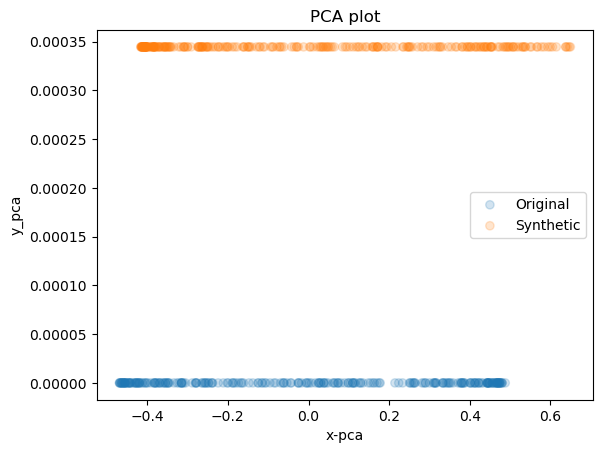

In [11]:
visualization(ori_data, new_data, 'pca')

c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.003s...
[t-SNE] Computed neighbors for 500 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.021662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.531578
[t-SNE] KL divergence after 300 iterations: 0.179744


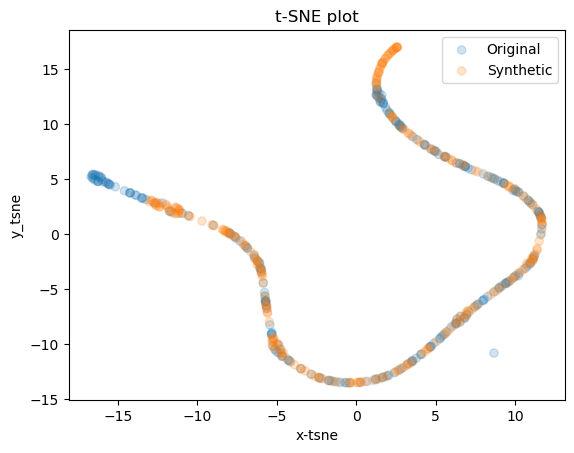

In [12]:
visualization(ori_data, new_data, 'tsne')

(250, 2, 4) (250, 2, 4)


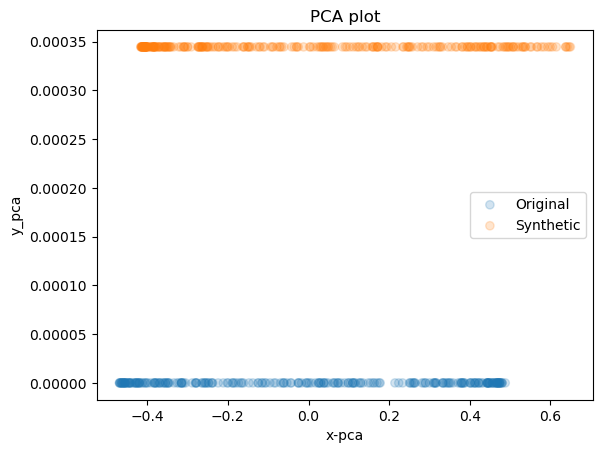

c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afons\miniconda3\envs\gasten3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.003s...
[t-SNE] Computed neighbors for 500 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.021662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.822113
[t-SNE] KL divergence after 300 iterations: 0.159794


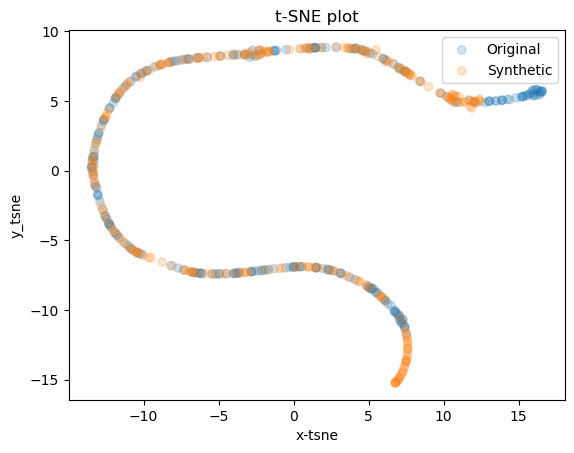

In [13]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

visualization(ori_data, new_data, 'pca')
visualization(ori_data, new_data, 'tsne')

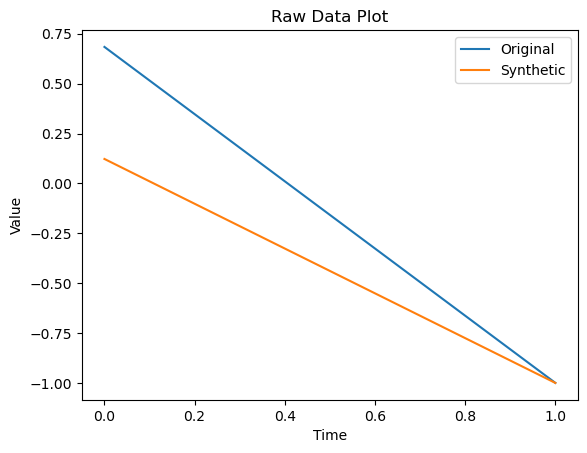

In [14]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

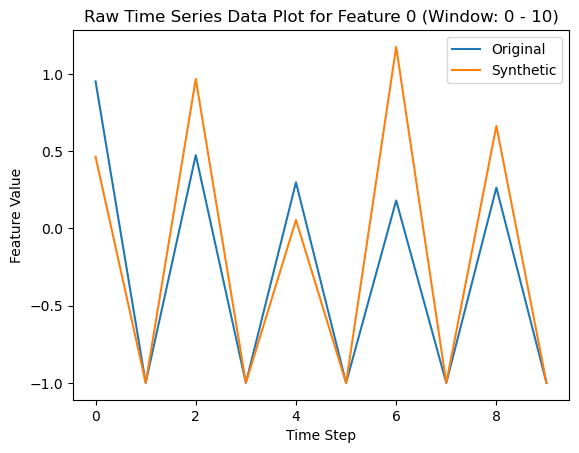

In [18]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 10  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


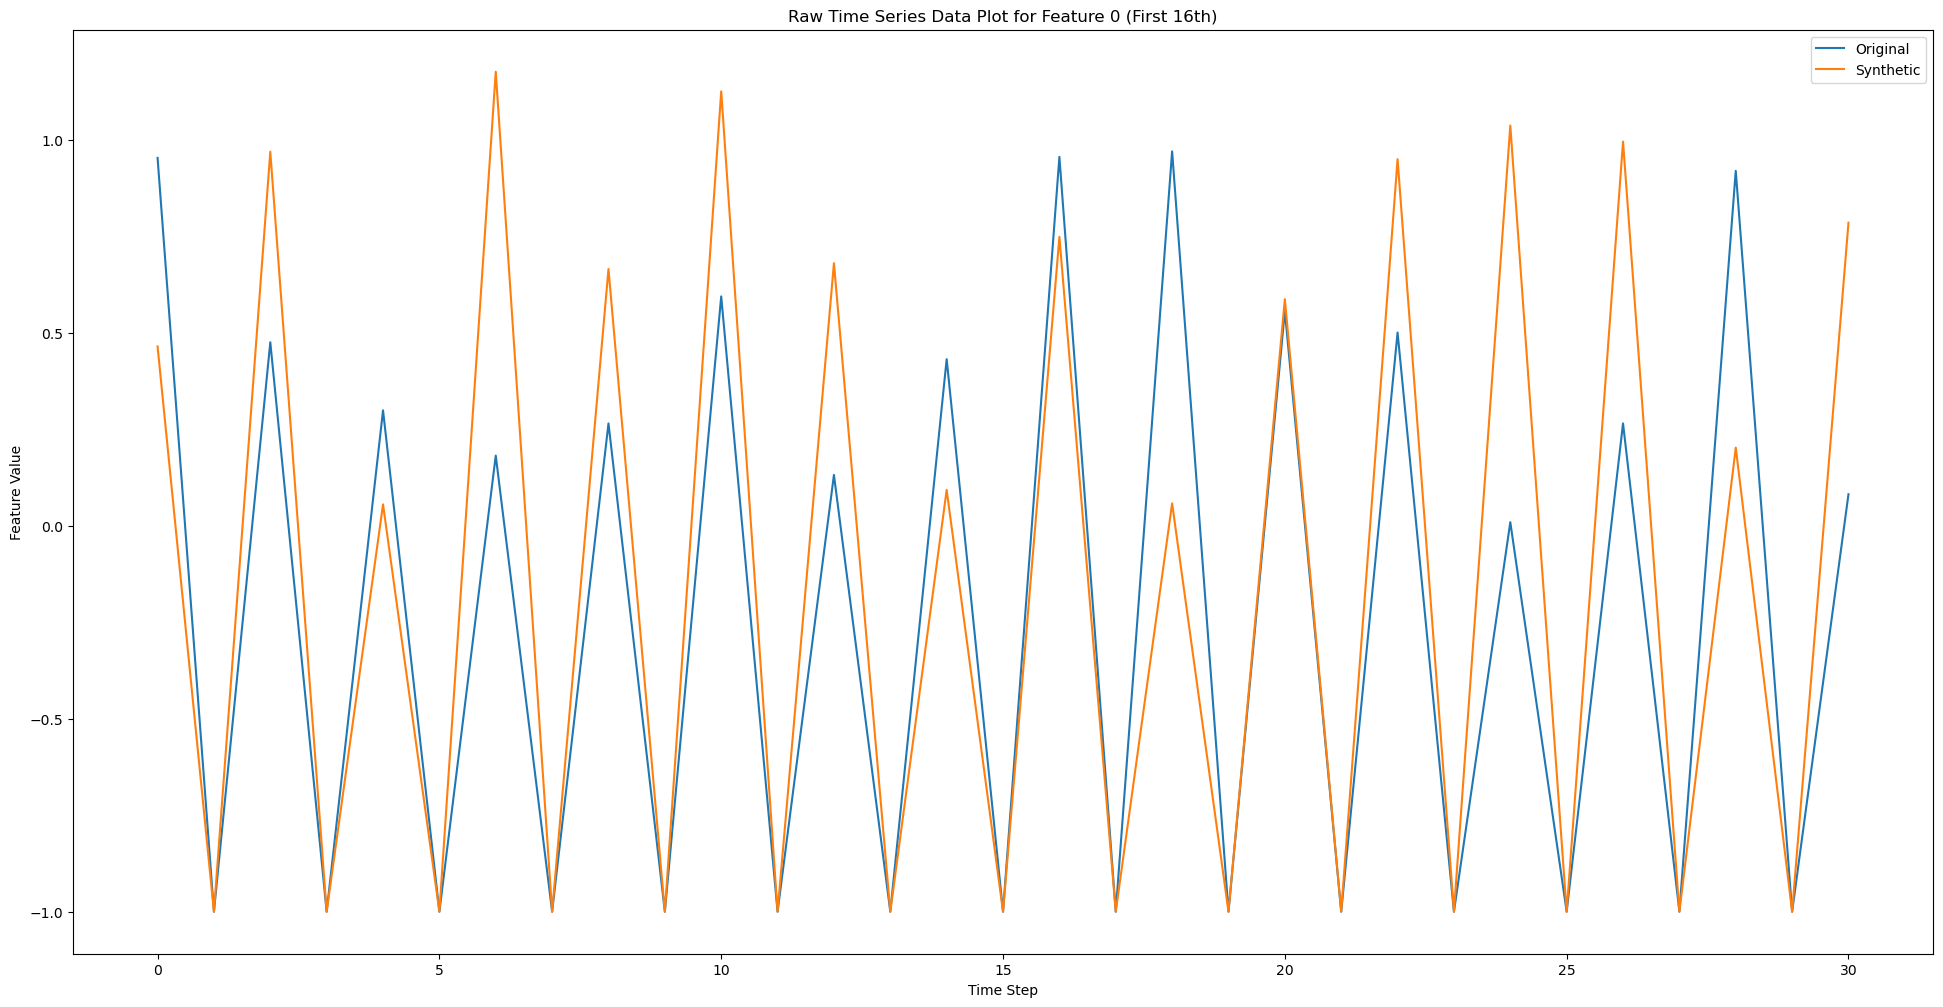

In [19]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()

1600


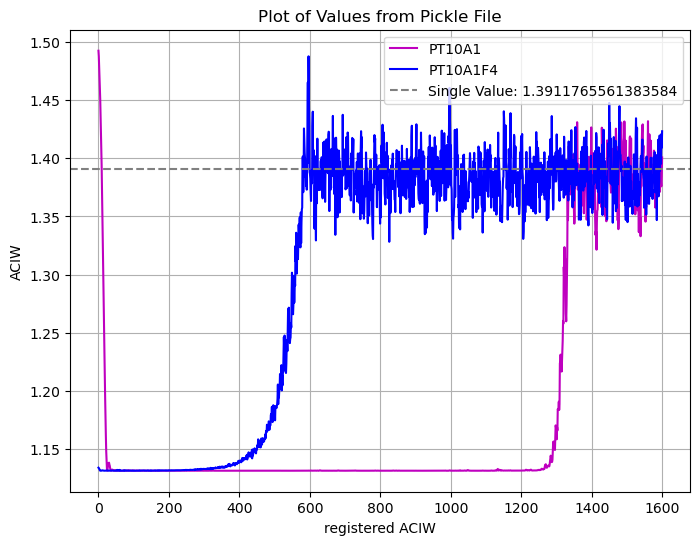

In [6]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A1_ARIMA.pickle", 'rb') as f:
    values_list4 = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A1_F4_ARIMA.pickle", 'rb') as f:
    values_list3 = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A50_F4_ARIMA.pickle", 'rb') as f:
    values_list5 = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list4, list):
    values_list4 = [values_list4]  # Convert to list if it's a single value

print(len(values_list4))

# Load the single value from the second pickle file
with open(f"{path}/sinfunc/ARIMA_ACIW_O.pickle", 'rb') as f:
    single_value = pickle.load(f)

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

plt.plot(values_list4, linestyle='-', color='m', label='PT10A1')  # Plot the values
plt.plot(values_list3, linestyle='-', color='b', label='PT10A1F4')  # Plot the values
#plt.plot(values_list5, linestyle='-', color='g', label='PT10A50F4')  # Plot the values
plt.axhline(y=single_value, color='gray', linestyle='--', label=f'Single Value: {single_value}')  # Add horizontal line

plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('registered ACIW')  # Set x-axis label (optional)
plt.ylabel('ACIW')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)
plt.legend()  # Show legend

plt.show()  # Display the plot

410


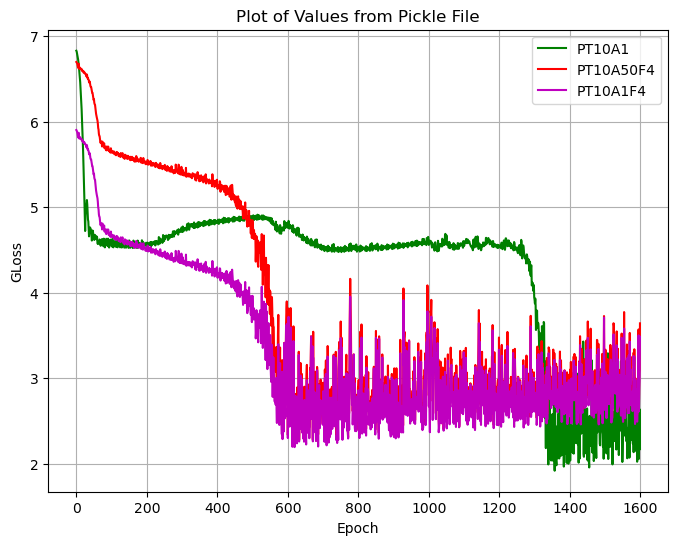

In [2]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_normal_only.pickle", 'rb') as f:
    values_list1 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A1_ARIMA.pickle", 'rb') as f:
    values_list2 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A50_F4_ARIMA.pickle", 'rb') as f:
    values_list3 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A1_F4_ARIMA.pickle", 'rb') as f:
    values_list4 = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list1, list):
    values_list1 = [values_list1]  # Convert to list if it's a single value

print(len(values_list1))

# Load the single value from the second pickle file

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

#plt.plot(values_list1, linestyle='-', color='b', label='GLoss_normal')  # Plot the values
plt.plot(values_list2, linestyle='-', color='g', label='PT10A1')  # Plot the values
plt.plot(values_list3, linestyle='-', color='r', label='PT10A50F4')  # Plot the values
plt.plot(values_list4, linestyle='-', color='m', label='PT10A1F4')  # Plot the values

plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('GLoss')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)
plt.legend()  # Show legend

plt.show()  # Display the plot

800


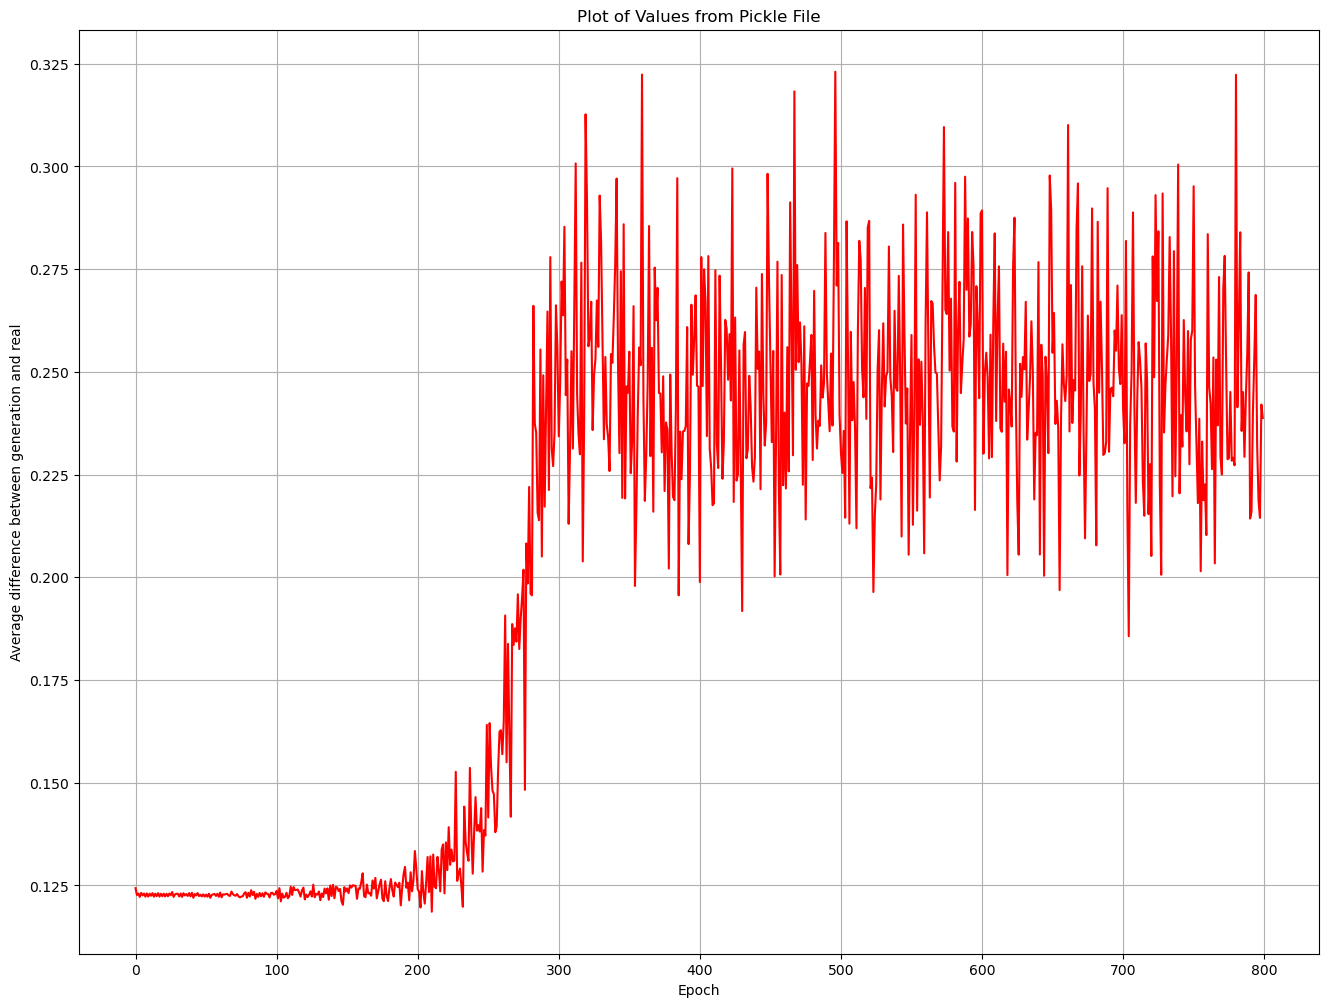

In [1]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/sinfunc/SIN_AD_PT10_A1_F4_ARIMA.pickle", 'rb') as f:
    values_list = pickle.load(f)

print(len(values_list))

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

# Plot the values
plt.figure(figsize=(16, 12))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='r')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('Average difference between generation and real')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

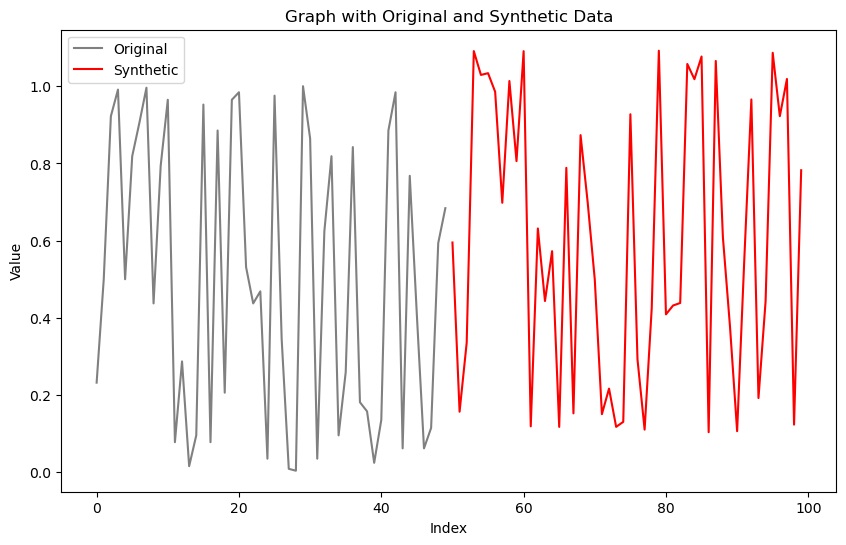

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='red', label='Synthetic')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph with Original and Synthetic Data')

# Add legend
plt.legend()

# Show plot
plt.show()



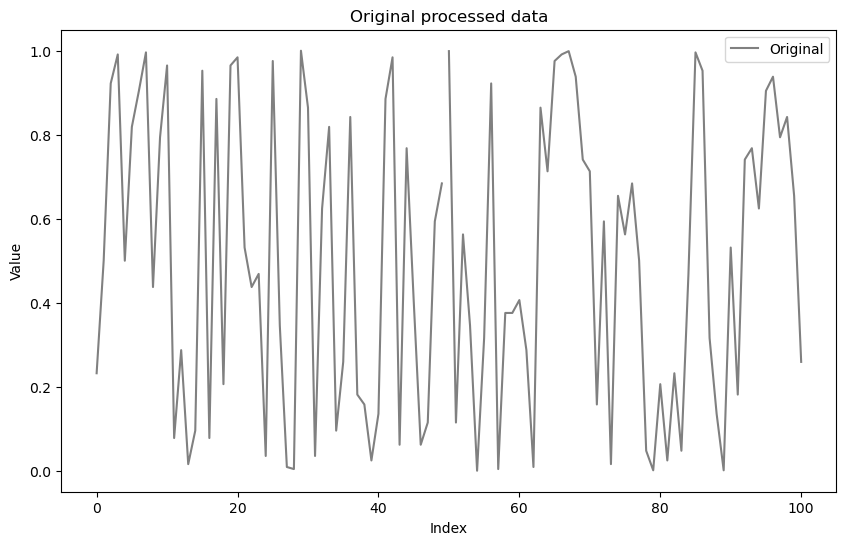

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(train, test):
    # Prepare DataFrame for original data (train) and synthetic data (test)
    new_train = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    new_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return new_train, new_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='gray')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original processed data')

# Add legend
plt.legend()

# Show plot
plt.show()

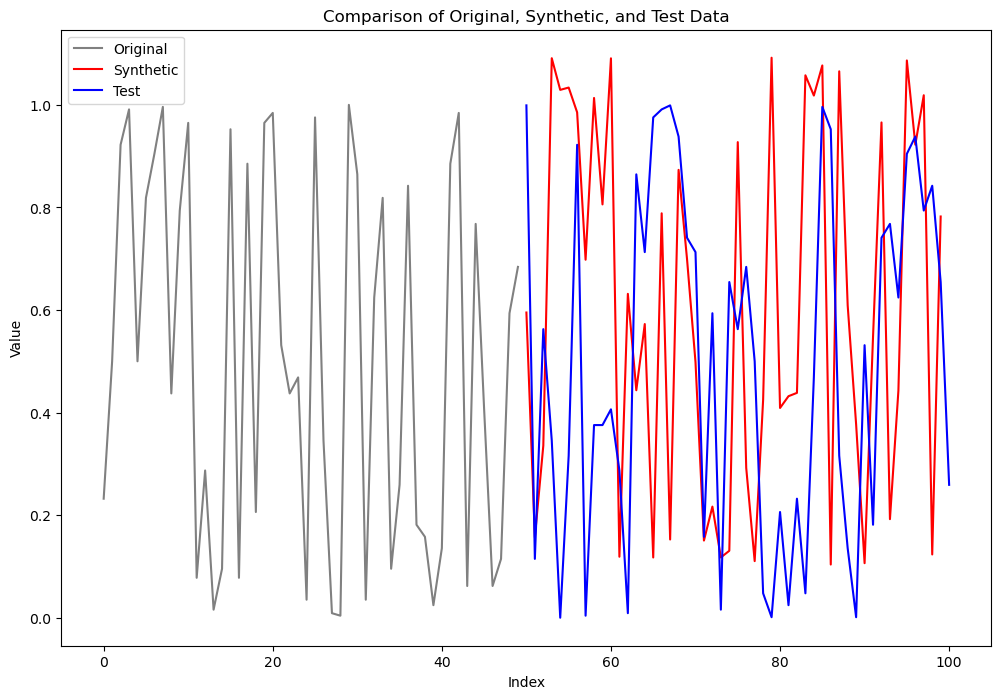

ValueError: Found input variables with inconsistent numbers of samples: [51, 50]

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def prepare_data(train, test):
    # Prepare DataFrame for data (train or test)
    data_df = pd.DataFrame({'idx': range(len(train)), 'val': train[:, 0, 0]})
    data_df_test = pd.DataFrame({'idx': range(len(train), len(train) + len(test)), 'val': test[:, 0, 0]})
    
    return data_df, data_df_test

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data(ori_data, fake_data)
_, df_test = prepare_data(ori_data, test_data)

# Plotting both graphs on the same figure
plt.figure(figsize=(12, 8))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_fake['idx'], df_fake['val'], color='red', label='Synthetic')

# Plot test data in blue
plt.plot(df_test['idx'], df_test['val'], color='blue', label='Test')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original, Synthetic, and Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()


print("Mean Absolute Error between Original and Synthetic Data: ", mean_absolute_error(df_test['val'], df_fake['val']))


In [80]:
import os
import pandas as pd

# Function to create directory if it does not exist
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to process each pair of train and test CSV files
def process_csv_pair(train_file, output_prefix):
    # Load the train and test datasets
    train_df = pd.read_csv(train_file)
    
    # Add the 'idx' column
    train_df.insert(0, 'Idx', range(1, len(train_df) + 1))
    
    # Specify the columns to process
    columns_to_process = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7']
    
    # Process each specified column
    for col in columns_to_process:
        # Select idx and current column from train and test datasets
        train_subset = train_df[['Idx', col]].copy()
        
        # Save the resulting dataframe to a CSV file
        output_file = f"{output_prefix}_{col}.csv"
        ensure_dir(output_file)  # Ensure the directory exists
        train_subset.to_csv(output_file, index=False)

# Example usage
pairs = [
    ("data/Daily-train.csv", "data/m4_assets/daily/D")
]

for train_file, output_prefix in pairs:
    process_csv_pair(train_file, output_prefix)


In [87]:
import pandas as pd

# Step 1: Read the dataset
file_path = 'data/m4_assets/daily/D_V7.csv'  # Update this path to your actual file location
df = pd.read_csv(file_path)

# Step 3: Function to categorize each half
def categorize_half(df):
    categories = {
        'macro': df.iloc[0:127].copy(),
        'micro': df.iloc[127:1603].copy(),
        'demographic': df.iloc[1603:1613].copy(),
        'Industry': df.iloc[1613:2035].copy(),
        'Finance': df.iloc[2035:3594].copy(),
        'Other': df.iloc[3594:4227].copy()
    }
    return categories

first_half_categories = categorize_half(df)


# Step 5: Reformat the Idx column
for category in first_half_categories.keys():
    first_half_categories[category]['Idx'] = range(1, len(first_half_categories[category]) + 1)

# Step 6: Save each category to a CSV file
output_directory = 'data/m4_assets/daily/V7/'  # Update this path to your desired output directory
for category, data in first_half_categories.items():
    output_file = f'{output_directory}{category}_combined.csv'
    data.to_csv(output_file, index=False)

# Print out a summary
for category, data in first_half_categories.items():
    print(f'{category} category has {len(data)} rows and columns: {list(data.columns)}')

macro category has 127 rows and columns: ['Idx', 'V7']
micro category has 1476 rows and columns: ['Idx', 'V7']
demographic category has 10 rows and columns: ['Idx', 'V7']
Industry category has 422 rows and columns: ['Idx', 'V7']
Finance category has 1559 rows and columns: ['Idx', 'V7']
Other category has 633 rows and columns: ['Idx', 'V7']
